## when colab use

In [3]:
# cd drive/My\ Drive/mge511_preject/

/content/drive/My Drive/mge511_preject


In [0]:
import os
import sys
import json
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.word2vec import Word2Vec
sys.path.append(os.pardir)
from models.word_embedding import get_embedding_matrix

In [0]:
DATA_IN_PATH = './assets/data/npy_data/2020-05-31/'
DATA_OUT_PATH = './model_save/cnn_model/'
# Data save label
TRAIN_INPUT_DATA = 'train_input.npy'
TEST_INPUT_DATA = 'test_input.npy'
DATA_CONFIGS = 'data_configs.json'
SEQ_CONFIGS = 'seq_configs_bt.json'

# Train label save file name
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_LABEL_SMALL = 'train_label_small.npy'
TEST_LABEL_DATA = 'test_label.npy'
TEST_LABEL_DATA_SMALL = 'test_label_small.npy'

In [0]:
from notebook_example.test_package.lstm_train import LSTMTrain

## Load pre-trained data

In [9]:
d2v_model_name = './model_save/embedding_model/Doc2vec_new.model'
doc_vectorizer = Doc2Vec.load(d2v_model_name)

w2v_model_name = './model_save/embedding_model/Word2vec1.model'
word_vectorizer = Word2Vec.load(w2v_model_name)

pre_trained_name = './model_save/embedding_model/trained_word2vec1.model'
pre_trained_w2v = Word2Vec.load(pre_trained_name)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [10]:
train_X = np.load(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'rb'))
train_Y = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'rb'))
test_X = np.load(open(DATA_IN_PATH + TEST_INPUT_DATA, 'rb'))
test_Y = np.load(open(DATA_IN_PATH + TEST_LABEL_DATA, 'rb'))
train_YS = tf.one_hot(train_Y, 43)
test_YS = tf.one_hot(test_Y, 43)
data_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))
vocab_size = data_configs['vocab_size'] + 1
print("vocab_size : ", vocab_size)
word_index = data_configs['vocab']

vocab_size :  30079


## 01. LSTM randomly weight initializer

### optimizer adam

In [7]:
lstm_train_rand = LSTMTrain(vocab_size=vocab_size, batch_size=128)

train_mode : rand, optimizer : adam, pre-trained_mode : None, model_name : lstm_rand_adam


In [8]:
model, histroy = lstm_train_rand.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'dropout_rate': 0.5, 'lstm_dimension': 128, 'dense_dimension': 64, 'train_mode': 'rand', 'output_dimension': 43, 'model_name': 'lstm_rand_adam'}
./model_save/rnn_model/lstm_rand_adam -- Folder create complete 

callback set
Epoch 1/1000
68/68 [==============================] - ETA: 0s - loss: 3.5064 - accuracy: 0.0886 - f1_score: 0.0374
Epoch 00001: val_accuracy improved from -inf to 0.22011, saving model to ./model_save/rnn_model/lstm_rand_adam/weights.h5
68/68 [==============================] - 10s 141ms/step - loss: 3.5064 - accuracy: 0.0886 - f1_score: 0.0374 - val_loss: 2.9464 - val_accuracy: 0.2201 - val_f1_score: 0.0803
Epoch 2/1000
68/68 [==============================] - ETA: 0s - loss: 2.4744 - accuracy: 0.3406 - f1_score: 0.1882
Epoch 00002: val_accuracy improved from 0.22011 to 0.48981, saving model to ./model_save/rnn_model/lstm_rand_adam/weights.h5
68/68 [==============================] - 8s 120ms/step - loss: 2.4744 - accuracy

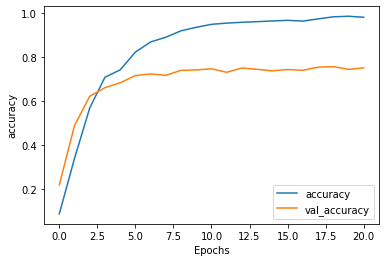

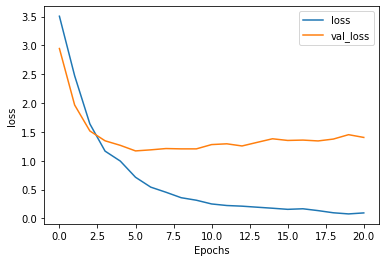

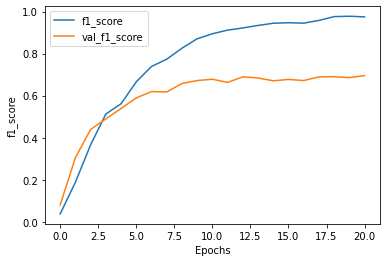

In [9]:
lstm_train_rand.train_plot(model, histroy)

In [10]:
lstm_train_rand.evaluation(model, test_X, test_YS)

145/145 [==============================] - 3s 18ms/step - loss: 1.2640 - accuracy: 0.7755 - f1_score: 0.7243


### optimizer radam

In [11]:
lstm_train_rand = LSTMTrain(vocab_size=vocab_size, 
                            batch_size=128,
                            optimizer='radam')

train_mode : rand, optimizer : radam, pre-trained_mode : None, model_name : lstm_rand_radam


In [12]:
model, histroy = lstm_train_rand.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'dropout_rate': 0.5, 'lstm_dimension': 128, 'dense_dimension': 64, 'train_mode': 'rand', 'output_dimension': 43, 'model_name': 'lstm_rand_radam'}
./model_save/rnn_model/lstm_rand_radam -- Folder create complete 

callback set
Epoch 1/1000
68/68 [==============================] - ETA: 0s - loss: 3.7503 - accuracy: 0.0404 - f1_score: 0.0205
Epoch 00001: val_accuracy improved from -inf to 0.05190, saving model to ./model_save/rnn_model/lstm_rand_radam/weights.h5
68/68 [==============================] - 12s 183ms/step - loss: 3.7503 - accuracy: 0.0404 - f1_score: 0.0205 - val_loss: 3.7202 - val_accuracy: 0.0519 - val_f1_score: 0.0026
Epoch 2/1000
68/68 [==============================] - ETA: 0s - loss: 3.6427 - accuracy: 0.0616 - f1_score: 0.0188
Epoch 00002: val_accuracy improved from 0.05190 to 0.09731, saving model to ./model_save/rnn_model/lstm_rand_radam/weights.h5
68/68 [==============================] - 11s 162ms/step - loss: 3.6427 - acc

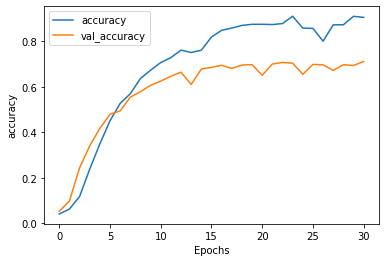

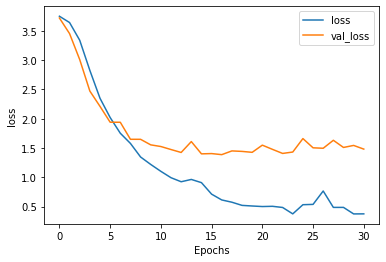

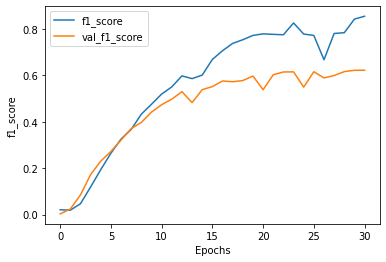

In [13]:
lstm_train_rand.train_plot(model, histroy)

In [14]:
lstm_train_rand.evaluation(model, test_X, test_YS)

145/145 [==============================] - 4s 26ms/step - loss: 1.4249 - accuracy: 0.7219 - f1_score: 0.6527


## 02. Bidirection LSTM word2vec

### optimizer adam

In [15]:
lstm_train_w2v = LSTMTrain(vocab_size=vocab_size, 
                            batch_size=128,
                            train_mode='pt',
                            pre_trained_mode='w2v',
                            word_index=word_index,
                            embedding_matrix=word_vectorizer
                            )

word index size :  30079
27423 2655
train_mode : pt, optimizer : adam, pre-trained_mode : w2v, model_name : lstm_pt_adam_w2v


In [16]:
model, histroy = lstm_train_w2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'dropout_rate': 0.5, 'lstm_dimension': 128, 'dense_dimension': 64, 'train_mode': 'pt', 'output_dimension': 43, 'model_name': 'lstm_pt_adam_w2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05204903, -0.21638015, -0.21948703, ...,  0.14667457,
        -0.02240289,  0.05068133],
       [-0.00398654,  0.07112884, -0.51496243, ...,  0.07860778,
        -0.33473143, -0.0859189 ],
       ...,
       [-0.60012555,  0.33054775, -0.45900419, ..., -0.22507869,
         0.13599187, -0.08460996],
       [ 0.48614532,  0.02564996, -0.16735327, ...,  0.38038063,
         0.16799502, -0.66553634],
       [ 0.79622883, -0.40894818,  0.2396446 , ..., -0.12865892,
        -0.75648826,  0.38904482]])}
./model_save/rnn_model/lstm_pt_adam_w2v -- Folder create complete 

callback set
Epoch 1/1000
68/68 [==============================] - ETA: 0s - loss: 3.0394 - accuracy: 0.2265

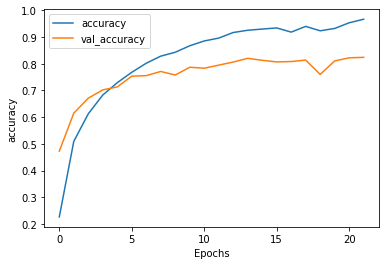

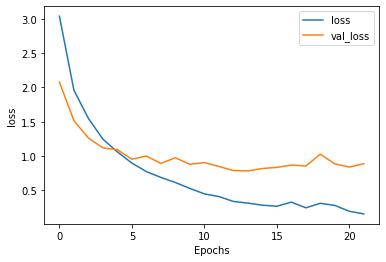

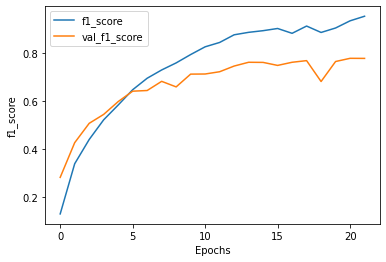

In [17]:
lstm_train_w2v.train_plot(model, histroy)

In [18]:
lstm_train_w2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 3s 18ms/step - loss: 0.8726 - accuracy: 0.8296 - f1_score: 0.7931


### optimizer radam

In [11]:
lstm_train_w2v = LSTMTrain(vocab_size=vocab_size, 
                            batch_size=128,
                            train_mode='pt',
                            optimizer='radam',
                            pre_trained_mode='w2v',
                            word_index=word_index,
                            embedding_matrix=word_vectorizer
                            )

word index size :  30079
27423 2655
train_mode : pt, optimizer : radam, pre-trained_mode : w2v, model_name : lstm_pt_radam_w2v


In [12]:
model, histroy = lstm_train_w2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'dropout_rate': 0.5, 'lstm_dimension': 128, 'dense_dimension': 64, 'train_mode': 'pt', 'output_dimension': 43, 'model_name': 'lstm_pt_radam_w2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05204903, -0.21638015, -0.21948703, ...,  0.14667457,
        -0.02240289,  0.05068133],
       [-0.00398654,  0.07112884, -0.51496243, ...,  0.07860778,
        -0.33473143, -0.0859189 ],
       ...,
       [-0.60012555,  0.33054775, -0.45900419, ..., -0.22507869,
         0.13599187, -0.08460996],
       [ 0.48614532,  0.02564996, -0.16735327, ...,  0.38038063,
         0.16799502, -0.66553634],
       [ 0.79622883, -0.40894818,  0.2396446 , ..., -0.12865892,
        -0.75648826,  0.38904482]])}
./model_save/rnn_model/lstm_pt_radam_w2v -- Folder create complete 

callback set
Epoch 1/1000
68/68 [==============================] - ETA: 0s - loss: 3.7240 - accuracy: 0.05

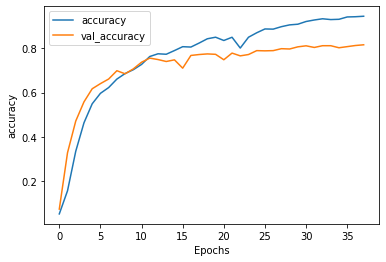

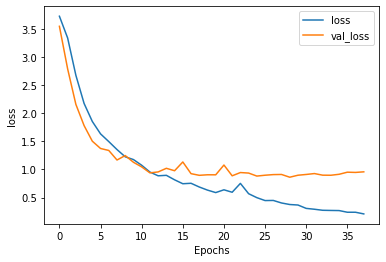

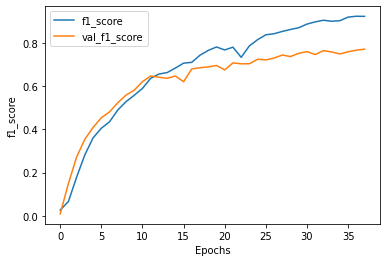

In [13]:
lstm_train_w2v.train_plot(model, histroy)

In [14]:
lstm_train_w2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 4s 25ms/step - loss: 0.8878 - accuracy: 0.8214 - f1_score: 0.7908


##  02. Bidirection LSTM doc2vec

### optimizer adam

In [15]:
lstm_train_d2v = LSTMTrain(vocab_size=vocab_size, 
                            batch_size=128,
                            train_mode='pt',
                            pre_trained_mode='d2v',
                            word_index=word_index,
                            embedding_matrix=doc_vectorizer
                            )

word index size :  30079
29582 496
train_mode : pt, optimizer : adam, pre-trained_mode : d2v, model_name : lstm_pt_adam_d2v


In [16]:
model, histroy = lstm_train_d2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'dropout_rate': 0.5, 'lstm_dimension': 128, 'dense_dimension': 64, 'train_mode': 'pt', 'output_dimension': 43, 'model_name': 'lstm_pt_adam_d2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92332149,  0.07046572, -0.11218019, ..., -0.90327078,
        -1.37625957,  0.42820612],
       [ 0.63682806,  0.139101  , -0.00578027, ...,  0.24532194,
        -0.9702155 ,  0.07838579],
       ...,
       [ 0.65864688, -0.21765059, -0.18377091, ...,  1.63431156,
        -0.64432347, -0.49664205],
       [-0.0473938 ,  0.43745145,  0.08863429, ..., -0.00531029,
         0.05797287, -0.49470472],
       [-0.37837368,  0.21734855, -0.05201286, ...,  0.09690577,
         0.74238676,  0.81506521]])}
./model_save/rnn_model/lstm_pt_adam_d2v -- Folder create complete 

callback set
Epoch 1/1000
68/68 [==============================] - ETA: 0s - loss: 3.4010 - accuracy: 0.1309

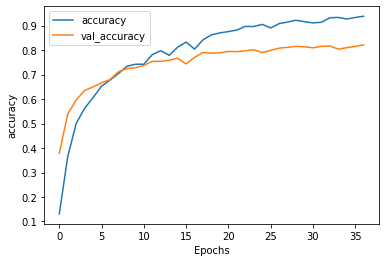

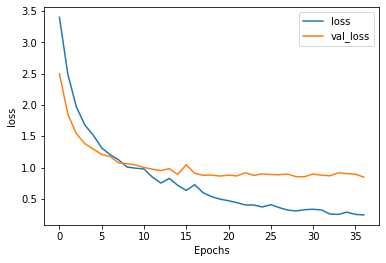

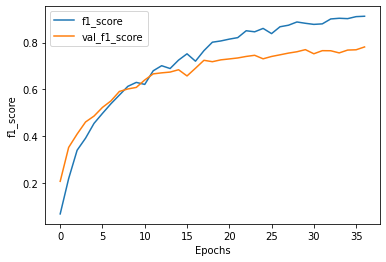

In [17]:
lstm_train_d2v.train_plot(model, histroy)

In [18]:
lstm_train_d2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 3s 18ms/step - loss: 0.8415 - accuracy: 0.8276 - f1_score: 0.7976


### optimizer radam

In [19]:
lstm_train_d2v = LSTMTrain(vocab_size=vocab_size, 
                            batch_size=128,
                            optimizer='radam',
                            train_mode='pt',
                            pre_trained_mode='d2v',
                            word_index=word_index,
                            embedding_matrix=doc_vectorizer
                            )

word index size :  30079
29582 496
train_mode : pt, optimizer : radam, pre-trained_mode : d2v, model_name : lstm_pt_radam_d2v


In [20]:
model, histroy = lstm_train_d2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'dropout_rate': 0.5, 'lstm_dimension': 128, 'dense_dimension': 64, 'train_mode': 'pt', 'output_dimension': 43, 'model_name': 'lstm_pt_radam_d2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92332149,  0.07046572, -0.11218019, ..., -0.90327078,
        -1.37625957,  0.42820612],
       [ 0.63682806,  0.139101  , -0.00578027, ...,  0.24532194,
        -0.9702155 ,  0.07838579],
       ...,
       [ 0.65864688, -0.21765059, -0.18377091, ...,  1.63431156,
        -0.64432347, -0.49664205],
       [-0.0473938 ,  0.43745145,  0.08863429, ..., -0.00531029,
         0.05797287, -0.49470472],
       [-0.37837368,  0.21734855, -0.05201286, ...,  0.09690577,
         0.74238676,  0.81506521]])}
./model_save/rnn_model/lstm_pt_radam_d2v -- Folder create complete 

callback set
Epoch 1/1000
68/68 [==============================] - ETA: 0s - loss: 3.7533 - accuracy: 0.03

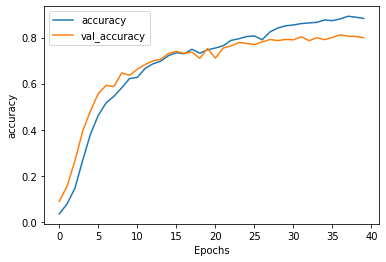

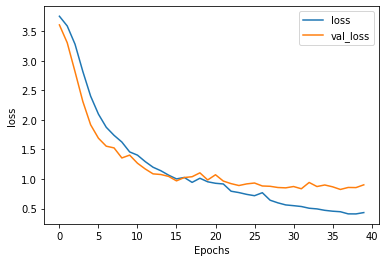

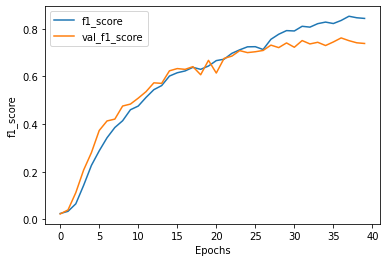

In [21]:
lstm_train_d2v.train_plot(model, histroy)

In [22]:
lstm_train_d2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 4s 25ms/step - loss: 0.7819 - accuracy: 0.8175 - f1_score: 0.7713


## 04. Bidirection LSTM pre-trained word2vec

### optimizer adam

In [23]:
lstm_train_pt_w2v = LSTMTrain(vocab_size=vocab_size, 
                            batch_size=128,
                            train_mode='pt',
                            pre_trained_mode='pt_w2v',
                            word_index=word_index,
                            embedding_matrix=pre_trained_w2v
                            )

word index size :  30079
28173 1905
train_mode : pt, optimizer : adam, pre-trained_mode : pt_w2v, model_name : lstm_pt_adam_pt_w2v


In [24]:
model, histroy = lstm_train_pt_w2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'dropout_rate': 0.5, 'lstm_dimension': 128, 'dense_dimension': 64, 'train_mode': 'pt', 'output_dimension': 43, 'model_name': 'lstm_pt_adam_pt_w2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.1215607 ,  0.20265704, -0.1296849 , ..., -0.25743967,
        -0.44502595, -0.15552975],
       [-0.07061617,  0.60541958,  0.0075527 , ...,  0.00845565,
        -0.01567723, -0.02487615],
       ...,
       [-0.73014832,  0.27339637, -0.06521773, ..., -0.30837446,
         0.41687673, -0.36610672],
       [-0.78842098, -0.6107676 , -0.37505671, ...,  0.14378503,
        -0.27998501, -0.66035861],
       [-0.59498692,  0.02842285,  0.46921459, ..., -0.48162848,
        -0.31085017, -0.19220926]])}
./model_save/rnn_model/lstm_pt_adam_pt_w2v -- Folder create complete 

callback set
Epoch 1/1000
68/68 [==============================] - ETA: 0s - loss: 2.9836 - accuracy: 

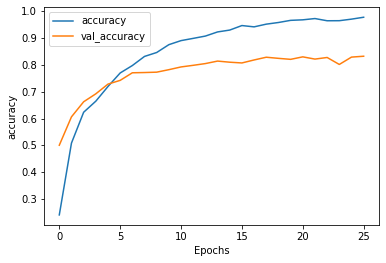

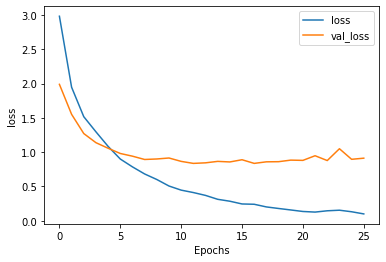

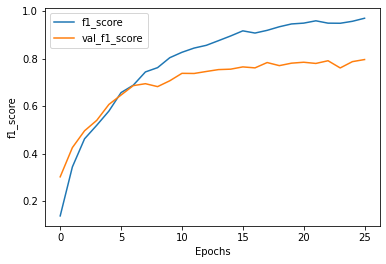

In [25]:
lstm_train_pt_w2v.train_plot(model, histroy)

In [26]:
lstm_train_pt_w2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 3s 18ms/step - loss: 0.8149 - accuracy: 0.8471 - f1_score: 0.8195


### optimizer radam

In [31]:
lstm_train_pt_w2v = LSTMTrain(vocab_size=vocab_size, 
                            batch_size=128,
                            train_mode='pt',
                            pre_trained_mode='pt_w2v',
                            optimizer='radam',
                            word_index=word_index,
                            embedding_matrix=pre_trained_w2v
                            )

word index size :  30079
28173 1905
train_mode : pt, optimizer : radam, pre-trained_mode : pt_w2v, model_name : lstm_pt_radam_pt_w2v


In [28]:
model, histroy = lstm_train_pt_w2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'dropout_rate': 0.5, 'lstm_dimension': 128, 'dense_dimension': 64, 'train_mode': 'pt', 'output_dimension': 43, 'model_name': 'lstm_pt_radam_pt_w2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.1215607 ,  0.20265704, -0.1296849 , ..., -0.25743967,
        -0.44502595, -0.15552975],
       [-0.07061617,  0.60541958,  0.0075527 , ...,  0.00845565,
        -0.01567723, -0.02487615],
       ...,
       [-0.73014832,  0.27339637, -0.06521773, ..., -0.30837446,
         0.41687673, -0.36610672],
       [-0.78842098, -0.6107676 , -0.37505671, ...,  0.14378503,
        -0.27998501, -0.66035861],
       [-0.59498692,  0.02842285,  0.46921459, ..., -0.48162848,
        -0.31085017, -0.19220926]])}
./model_save/rnn_model/lstm_pt_radam_pt_w2v -- Folder create complete 

callback set
Epoch 1/1000
68/68 [==============================] - ETA: 0s - loss: 3.7208 - accuracy

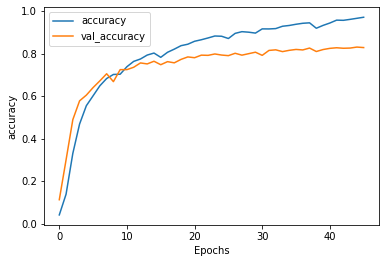

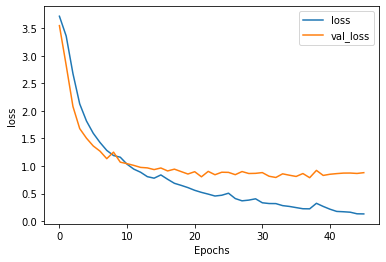

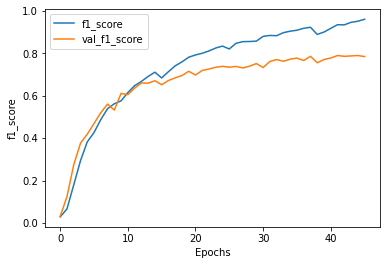

In [29]:
lstm_train_pt_w2v.train_plot(model, histroy)

In [30]:
lstm_train_pt_w2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 3s 22ms/step - loss: 0.8131 - accuracy: 0.8443 - f1_score: 0.8163
